In [200]:
import numpy as np
import matplotlib.pyplot as plt

from propagation import fresnel_propagation, fraunhofer_propagation
from focal_spot_pattern import create_gaussian_mask

In [186]:
# known parameters from Zhang et al. (2020)
wavelength = 0.5e-6
dx = 5e-6
N = 1000
l = 2.5e-3
w0 = l/4

z = [30e-3, 100e-3, 300e-3]

x = np.linspace(-dx * N / 2, dx * N / 2, N, endpoint=False)
y = x.copy()
X, Y = np.meshgrid(x, y)

In [187]:
E_in = np.ones((N, N), dtype=np.complex128)
E_in[X< -l/2] = 0 + 0j
E_in[X > l/2] = 0 + 0j
E_in[Y< -l/2] = 0 + 0j
E_in[Y > l/2] = 0 + 0j

E_out_list = []

for z_it in z:
    E_out, start, end = fresnel_propagation(E_in, wavelength, z_it, dx, padding_factor=2)
    E_out_list.append(E_out[start:end, start:end])

100000.0 99999.99999999999
100000.0 99999.99999999999
100000.0 99999.99999999999


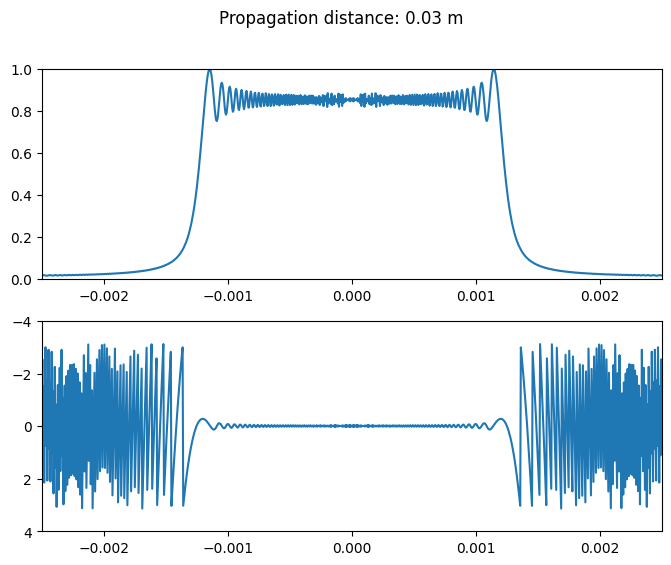

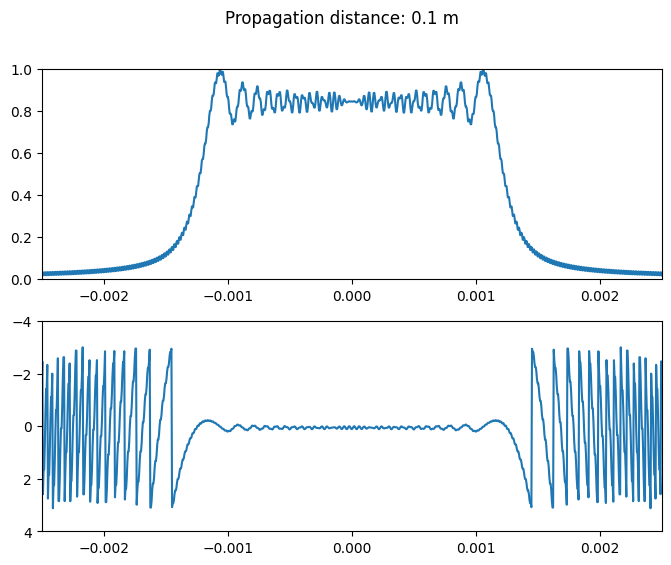

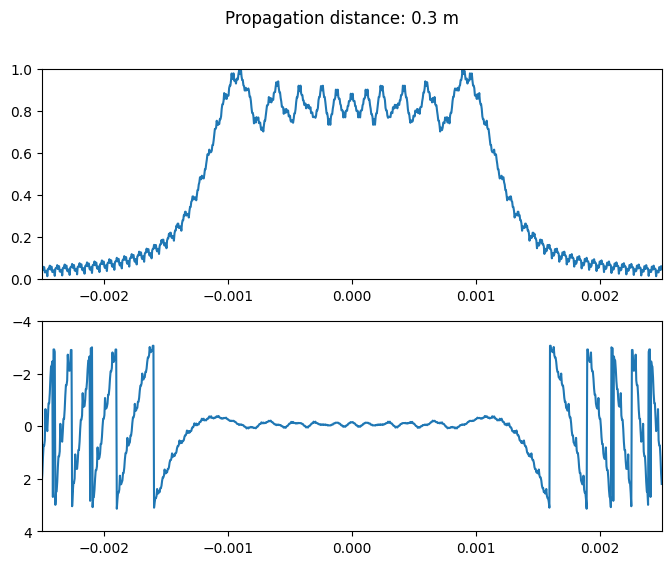

In [188]:
for i in range(len(z)):
    fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8, 6))
    ax[0].plot(x, np.abs(E_out_list[i][N//2])/np.max(np.abs(E_out_list[i][N//2])))
    ax[1].plot(x, np.angle(E_out_list[i][N//2]))
    ax[0].set_xlim(x[0], x[-1])
    ax[1].set_xlim(x[0], x[-1])
    ax[0].set_ylim(0,1)
    ax[1].set_ylim(4,-4)
    fig.suptitle(f'Propagation distance: {z[i]} m')

In [195]:
dX = dx + 2*z[0]*np.tan(np.asin(wavelength/(2*dx)))/N

x_prime = np.linspace(-dX/2 * N, dX/2 * N, N, endpoint=False)
y_prime = np.linspace(-dX/2 * N, dX/2 * N, N, endpoint=False)
X_prime, Y_prime = np.meshgrid(x_prime, y_prime)

In [197]:
def w(w0, lambda_, z):
    return w0 * np.sqrt(1 + (lambda_*z/(np.pi*w0*w0))**2)

In [ ]:
E_in = create_gaussian_mask(X, Y, w0)

E_out, start, end = fraunhofer_propagation(E_in, wavelength, z[0], dx, padding_factor=2)
E_out = E_out[start:end, start:end]

print(w0)
w_th = w(w0, wavelength, z[0])
print(w_th)
I_th = (w0/w_th)**2 * np.exp(-2*(X**2+Y**2)/(w_th**2))

plt.figure(figsize=(8, 6))

plt.subplot(121)
plt.imshow(np.abs(E_in)**2, cmap='rainbow')
plt.subplot(122)
plt.imshow(np.abs(E_out)**2, cmap='rainbow')

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.plot(x, np.abs(E_in[int(len(E_in)/2)])**2)
plt.axhline(y=1/np.exp(1)**2)
plt.axvline(x=w0)
plt.subplot(122)
plt.plot(x_prime, np.abs(E_out[int(len(E_out)/2)])**2)
plt.axhline(y=1/np.exp(1)**2)
plt.axvline(x=w_th)
plt.axvline(x=w0, color="red")
#plt.ylim(1/np.exp(1)**2-0.0001, 1/np.exp(1)**2+0.0001)
#plt.xlim(w0-1e-8, w_th+1e-8)

TypeError: 'int' object is not subscriptable

In [255]:
# known parameters from Zhang et al. (2020)
wavelength = 0.5e-6
dx = 5e-6
N = 1000
l = 2.5e-3
w0 = l/16

z = 1

x = np.linspace(-dx * N / 2, dx * N / 2, N, endpoint=False)
y = x.copy()
X, Y = np.meshgrid(x, y)

print(w0*w0/(wavelength*z))

0.04882812500000001


In [ ]:
dX = dx + 2*z[0]*np.tan(np.asin(wavelength/(2*dx)))/N

x_prime = np.linspace(-dX/2 * N, dX/2 * N, N, endpoint=False)
y_prime = np.linspace(-dX/2 * N, dX/2 * N, N, endpoint=False)
X_prime, Y_prime = np.meshgrid(x_prime, y_prime)

In [258]:
def w(w0, lambda_, z):
    return w0 * np.sqrt(1 + (lambda_*z/(np.pi*w0*w0))**2)

w_th = w(w0, wavelength, z)

0.00015625
0.0010305061780491848


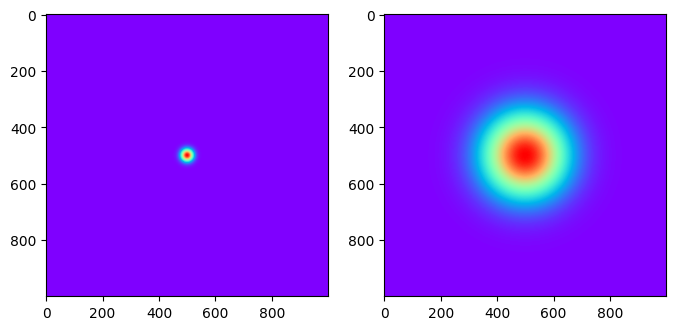

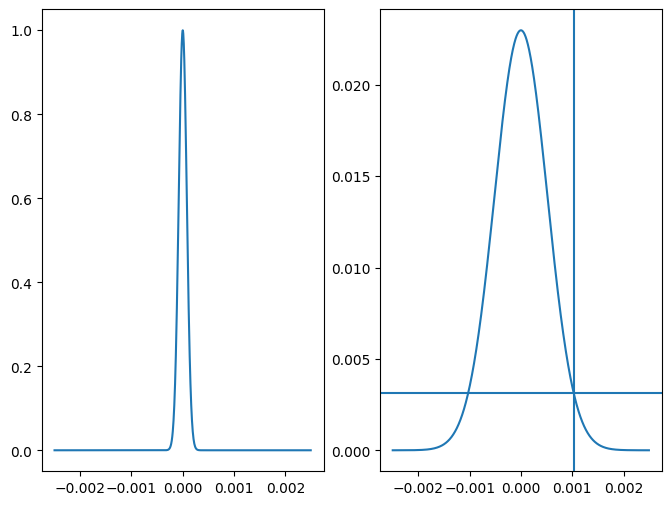

In [266]:
E_in = create_gaussian_mask(X, Y, w0)

E_out = fraunhofer_propagation(E_in, wavelength, z, dx, padding_factor=2)

print(w0)
w_th = w(w0, wavelength, z)
print(w_th)
I_th = (w0/w_th)**2 * np.exp(-2*(X**2+Y**2)/(w_th**2))

plt.figure(figsize=(8, 6))

plt.subplot(121)
plt.imshow(np.abs(E_in)**2, cmap='rainbow')
plt.subplot(122)
plt.imshow(np.abs(E_out)**2, cmap='rainbow')

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.plot(x, np.abs(E_in[int(len(E_in)/2)])**2)
plt.subplot(122)
plt.plot(x, np.abs(E_out[int(len(E_out)/2)])**2)
plt.axhline(y=1/(np.exp(1)**2)*np.max(np.abs(E_out[int(len(E_out)/2)])**2))
plt.axvline(x=w_th)